In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file_path = 'https://raw.githubusercontent.com/llimllib/bostonmarathon/master/results/2014/results.csv'
boston = pd.read_csv(file_path)
pd.set_option('display.max_columns', 30)
boston.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,71.40,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,116.37,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,67.42,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,116.37,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,67.83,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [3]:
bostonModel = boston[['10k','25k','official','35k','pace','30k','half','5k','40k']]

In [4]:
#new data set with only continuous features
bostonModel.head()



,10k,25k,official,35k,pace,30k,half,5k,40k
0,17.37,47.67,85.25,71.40,3.27,59.18,39.72,8.02,80.43
1,32.58,82.43,138.95,116.37,5.30,99.33,69.47,16.22,132.10
2,16.62,45.80,80.60,67.42,3.08,56.45,38.03,7.75,76.10
3,32.57,82.43,140.58,116.37,5.37,99.33,69.47,16.20,132.95
4,17.12,46.37,81.23,67.83,3.10,57.03,38.60,8.02,76.72


In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

In [6]:
bostonModel = bostonModel.replace('-', pd.np.nan).dropna(axis=0, how='any', subset=bostonModel.columns)

In [7]:
X = bostonModel
X = X.apply(pd.to_numeric)

### Scale --> PCA --> KMeans

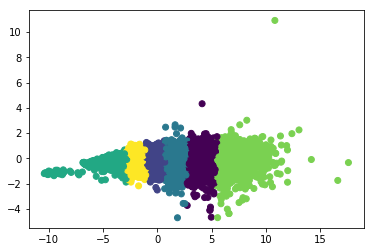

0.9939258232821897


In [8]:
scale = StandardScaler()
X_norm = scale.fit_transform(X)
X_pca = PCA(n_components=2)
X_pcafit = X_pca.fit_transform(X_norm)

y_pred = KMeans(n_clusters = 6).fit_predict(X_pcafit)

plt.scatter(X_pcafit[:, 0], X_pcafit[:, 1], c=y_pred)
plt.show()
print(np.sum(X_pca.explained_variance_ratio_))


### Zscore --> PCA --> KMeans

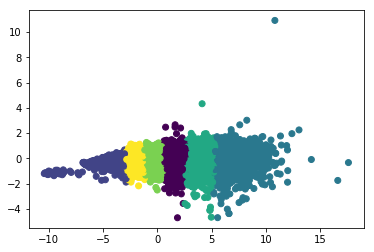

0.9939258232821901


In [9]:
zscore = X.apply(zscore)
X_pcaz = PCA(n_components=2)
X_pcafitz = X_pcaz.fit_transform(zscore)

y_predz = KMeans(n_clusters = 6).fit_predict(X_pcafitz)

plt.scatter(X_pcafitz[:, 0], X_pcafitz[:, 1], c=y_predz)
plt.show()
print(np.sum(X_pcaz.explained_variance_ratio_))

### PCA --> MiniBatchKMeans

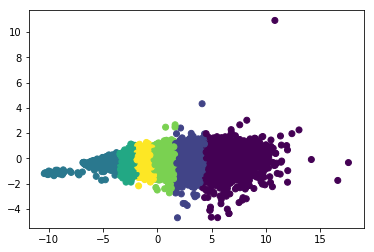

Comparing k-means and mini batch k-means solutions:
col_0     0     1     2     3     4     5
row_0                                    
0      1169     0     0     0  1836     0
1      2662     0  2652     0     0     0
2         0     0     0  2543     0     0
3         0     0     0  2619     0  3674
4         0  3873  2707     0     0     0
5         0  3429     0     0     0  4490
(31654, 2)


In [10]:
minibatchkmeans = MiniBatchKMeans(init='random', n_clusters=6, batch_size=200)
minibatchkmeans.fit(X_pcafit)

predict_mini = minibatchkmeans.predict(X_pcafit)

plt.scatter(X_pcafit[:, 0], X_pcafit[:, 1], c=predict_mini)
plt.show()

print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))
print(X_pcafit.shape)

### Zscore --> PCA --> MiniBatchKMeans

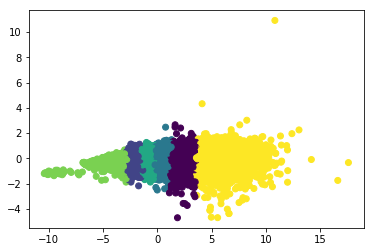

Comparing k-means and mini batch k-means solutions:
col_0     0     1     2     3     4     5
row_0                                    
0      3458     0     0  1689     0     0
1         0     0     0     0     0  6011
2      2062     0     0     0  3242     0
3         0     0     0     0  4193  1683
4         0  4946     0     0     0   216
5         0     0  1944  2210     0     0
(31654, 2)


In [11]:
minibatchkmeansz = MiniBatchKMeans(init='random', n_clusters=6, batch_size=200)
minibatchkmeansz.fit(X_pcafitz)

predict_miniz = minibatchkmeansz.predict(X_pcafitz)

plt.scatter(X_pcafitz[:, 0], X_pcafitz[:, 1], c=predict_miniz)
plt.show()

print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_miniz, y_predz))
print(X_pcafitz.shape)

### Mean Shift w/PCA

Number of estimated clusters: 6


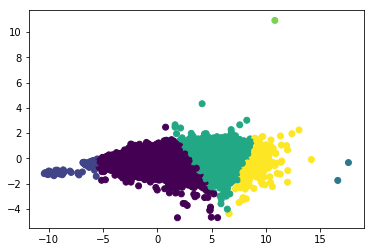

In [12]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.model_selection import train_test_split

bandwidth = estimate_bandwidth(X_pcafit, quantile=0.25)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_pcafit)
labels = ms.labels_

cluster_centers = ms.cluster_centers_

n_clusters_ = len(np.unique(labels))

print('Number of estimated clusters: {}'.format(n_clusters_))

plt.scatter(X_pcafit[:, 0], X_pcafit[:, 1], c=labels)
plt.show()

In [30]:
df = pd.DataFrame(X_pcafit,columns=['x','y'])
data = X.join(df)
data['labels'] = labels
data[data['labels'] == 4]

,10k,25k,official,35k,pace,30k,half,5k,40k,x,y,labels
17284,112.38,190.03,297.83,249.47,11.37,217.27,169.6,86.95,283.68,1.863747,-0.669751,4


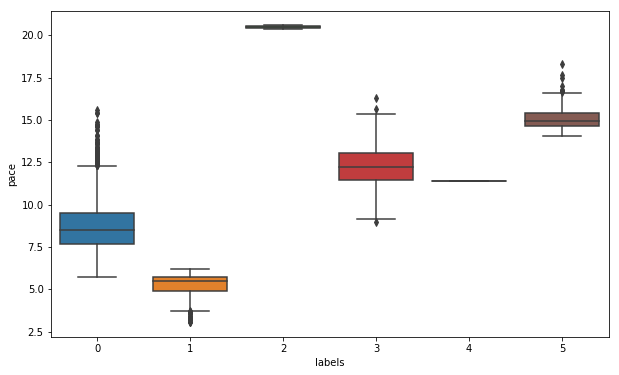

In [31]:
plt.figure(figsize=(10,6))
sns.boxplot(x='labels', y='pace',data=data)
plt.show()

Mean shift with PCA data identifies outliers in the dataset.  Cluster 2 identifies the two runners with the longest overall finish time.  Cluster 4 only contains one point which in my opinion is not an outlier.  I'm curious to know why this point is in its own cluster.  

While it doesn't paint an overall picture of the runners, it can help with removing outliers for modeling.


### Mean Shift w/o PCA

Number of estimated clusters: 5


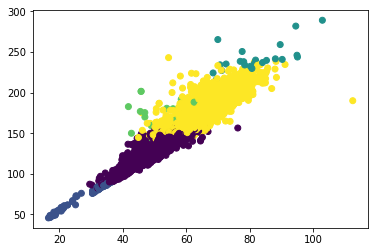

In [109]:
bandwidth = estimate_bandwidth(X, quantile=0.3)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_

cluster_centers = ms.cluster_centers_

n_clusters_ = len(np.unique(labels))

print('Number of estimated clusters: {}'.format(n_clusters_))

plt.scatter(X.iloc[:, 0], X.iloc[:, 1],c=labels)
plt.show()

### Spectral Clustering

In [ ]:
sample = X.sample(n=10000)

X_normsample = normalize(sample)
X_pcasample = PCA(n_components=2)
X_pcafitsample = X_pcasample.fit_transform(sample)

print(np.sum(X_pcasample.explained_variance_ratio_))

In [ ]:
from sklearn.cluster import SpectralClustering


scsample = SpectralClustering(n_clusters=3)
scsample.fit(X_pcafitsample)

predict = scsample.fit_predict(X_pcafitsample)

plt.scatter(X_pcafitsample[:,0], X_pcafitsample[:, 1], c=predict)
plt.show()

In [ ]:
from sklearn.metrics import pairwise_distances
labels = scsample.labels_
print(metrics.silhouette_score(X_pcafitsample, labels, metric='euclidean'))

### Affinity Propagation

In [49]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

af = AffinityPropagation().fit(X_pcafitsample)
print('Done')

cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 7227
